In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = np.load("./output/results.npy")
data.shape

(851, 3, 180)

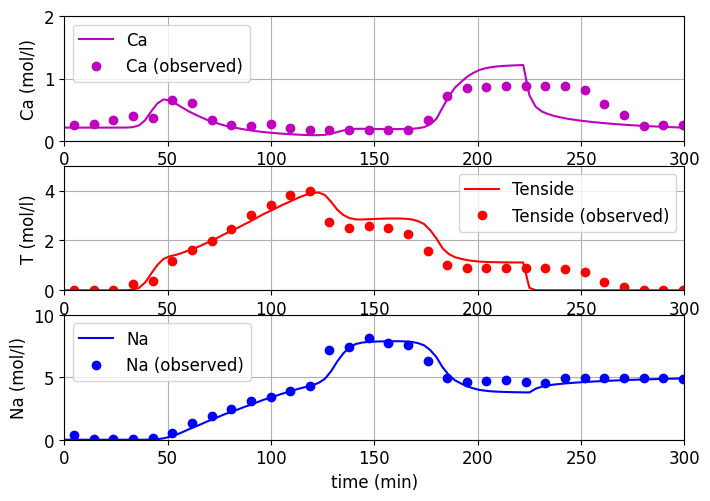

In [2]:

save_times = np.array([0, 2.083E-03, 4.167E-03, 6.250E-03, 8.333E-03, 1.042E-02, .0125, 1.458E-02, 1.667E-02, .01875, 2.083E-02, 2.292E-02, .025, 
                    2.708E-02, 2.917E-02, .03125, 3.333E-02, 3.542E-02, 3.750E-02, 3.958E-02, 4.167E-02, 4.375E-02, 4.583E-02, 4.792E-02, 5.000E-02, 
                    5.208E-02, 5.417E-02, 5.625E-02, 5.833E-02, 6.042E-02, 6.250E-02, 6.458E-02, 6.667E-02, 6.875E-02, 7.083E-02, 7.292E-02, 7.500E-02, 
                    7.708E-02, 7.917E-02, .08125, 8.333E-02, 8.542E-02, .0875, 8.958E-02, 9.167E-02, 9.375E-02, 9.583E-02, 9.792E-02, 1.000E-01, .1020833, 
                    .1041666, .10625, .1083333, .1104166, .1125, .1145833, .1166666, .11875, .1208333, .1229166, .125, .1270833, .1291666, .13125, 
                    .1333333, .1354166, .1375, .1395833, .1416666, .14375, .1458333, .1479166, .1499999, .1520833, .1541666, .1562499, .1583333, .1604166, 
                    .1624999, .1645833, .1666666, .1687499, .1708333, .1729166, .1749999, .1770833, .1791666, .1812499, .1833332, .1854166, .1874999, .1895832, 
                    .1916666, .1937499, .1958332, .1979166, .1999999, .2020832, .2041666, .2062499, .2083332])

times_meas = np.arange(4.7498, 4.7498 + 9.4995 * (31 + 1), 9.4995)
T_dist = np.array([0, 0, 0, 0.3, 0.43, 1.4, 1.92, 2.39, 2.93, 3.6, 4.10, 4.58, 4.76, 3.3, 2.97, 3.08, 3.0, 2.72, 1.90, 1.20, 1.06, 1.06, 1.06, 1.06, 1.06, 1.0, 0.86, 0.41, 0.16, 0, 0, 0, ])
T_meas = T_dist * 0.007 / 8.38 # cm * mol/l / cm
T_meas = T_meas * 1000 # mmol/l

Na_dist = np.array([0.42, 0.1, 0.08, 0.1, 0.15, 0.63, 1.61, 2.31, 3.0, 3.7, 4.12, 4.72, 5.12, 8.58, 8.95, 9.8, 9.3, 9.12, 7.58, 5.95, 5.56, 5.6, 5.7, 5.55, 5.48, 5.9, 5.98, 5.98, 5.9, 5.92, 5.91, 5.8])
Na_meas = Na_dist * 0.007 / 8.38
Na_meas = Na_meas * 1000 # mmol/l

Ca_dist = np.array([0.3, 0.33, 0.4, 0.48, 0.43, 0.78, 0.72, 0.4, 0.3, 0.28, 0.32, 0.25, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.87, 1.01, 1.03, 1.05, 1.06, 1.06, 1.05, 0.97, 0.7, 0.49, 0.28, 0.31, 0.3])
Ca_meas = Ca_dist * 0.007 / 8.38
Ca_meas = Ca_meas * 1000 # mmol/l

new_save_times = save_times / (0.20833334 / 850)
new_save_times = new_save_times.astype(int)

# ! results
myresults = data # np.load("Dresults.npy")

myca = myresults[:, 0, -1]*1000
myt = myresults[:, 1, -1]*1000
myna = myresults[:, 2, -1]*1000

# print(save_times.shape[0])
# plt.plot(save_times)

fig = plt.figure(figsize=(8, 5.5))
ax = fig.add_subplot(3, 1, 1)
ax.plot(save_times* 24 *60, myca[new_save_times], 'm', label='Ca')
ax.plot(times_meas, Ca_meas, 'mo', label='Ca (observed)')
ax.grid(True)
ax.set_xlim([0, 300])
ax.set_ylim([0, 2])
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_ylabel('Ca (mol/l)', fontsize=12)
ax.legend(fontsize=12)

ax = fig.add_subplot(3, 1, 2)
ax.plot(save_times* 24 *60, myt[new_save_times], 'r', label='Tenside')
ax.plot(times_meas, T_meas, 'ro', label='Tenside (observed)')
ax.grid(True)
ax.set_xlim([0, 300])
ax.set_ylim([0, 5])
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_ylabel('T (mol/l)', fontsize=12)
ax.legend(fontsize=12)

ax = fig.add_subplot(3, 1, 3)
ax.plot(save_times* 24 *60, myna[new_save_times], 'b', label='Na')
ax.plot(times_meas, Na_meas, 'bo', label='Na (observed)')
ax.grid(True)
ax.set_xlim([0, 300])
ax.set_ylim([0, 10])
ax.set_xlabel('time (min)', fontsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_ylabel('Na (mol/l)', fontsize=12)
ax.legend(fontsize=12)
plt.show()